In [1]:
library(TDA)
library(repr)
library(aplpack)
library(stringr)
library(scatterplot3d)

packageVersion("TDA")

Loading required package: tcltk
Warning message:
“no DISPLAY variable so Tk is not available”

[1] ‘1.6.4’

#### Setup Ripser

In [2]:
## Parse raw output from Ripser
parseOutput = function( output ){
    
    ## Number of intervals by dimension
    indices            = grep( "persistence intervals in dim " , output , value = FALSE )
    maxDimension       = length( indices ) - 1
    indices            = c( indices , length( output ) )
    
    ## Convert output in matrix
    diagram = matrix(, ncol = 3, nrow = 0 )
    
    ## Loop each group of intervals by dimension
    for( dim in 0:maxDimension ){
        
        ## Select intervals
        if( dim == maxDimension ){
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] ) ]
        }else{
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] - 1 ) ]
        }
        
        ## Removed lines from output
        intervals = grep( "\\[\\d*\\.?\\d+\\,\\d*\\.?\\d+\\)" , intervals , value = TRUE )
        
        ## Remove punctuation from intervals
        intervals = gsub( "(\\s|\\[|\\))" , "" , intervals )
        
        ## Split interval and convert to numeric
        intervals = as.numeric( unlist( strsplit( intervals , "," ) ) )
        
        ## Convert ouput in matrix
        intervals = matrix( intervals , ncol = 2 , byrow = T )
        
        ## Add dimension column
        intervals = cbind( rep( dim , nrow( intervals ) ) , intervals )
        
        ## Add intervals to diagram
        diagram = rbind( diagram, intervals )
        
    }
    
    ## Format matrix to diagram format
    colnames( diagram ) = c( "dimension" , "Birth" , "Death" )
    
    return( diagram )    
}

## Calculate rips diagram using Ripser library
ripserDiag = function( X, dimension, threshold, format = "point-cloud" ){
    
    # Ripser likes to read files in, so use a temporary file
    f = tempfile()
    write.table(X, f, col.names = FALSE, row.names = FALSE)
    
    ## Set parameters as text
    dimension = as.character( dimension )
    threshold = as.character( threshold )
    
    ## Run Ripser using system command
    ripserOut = system2("/home/labmember/ripser/ripser", args = c("--dim", dimension, "--threshold", threshold, "--format", format , f), stdout = TRUE)
    
    return( parseOutput( ripserOut ) )
}

#### Synthetic Data: Points on a circle

In [3]:
X <- circleUnif(n = 15)

#### Compute Vietoris-Rips and Alpha complexes

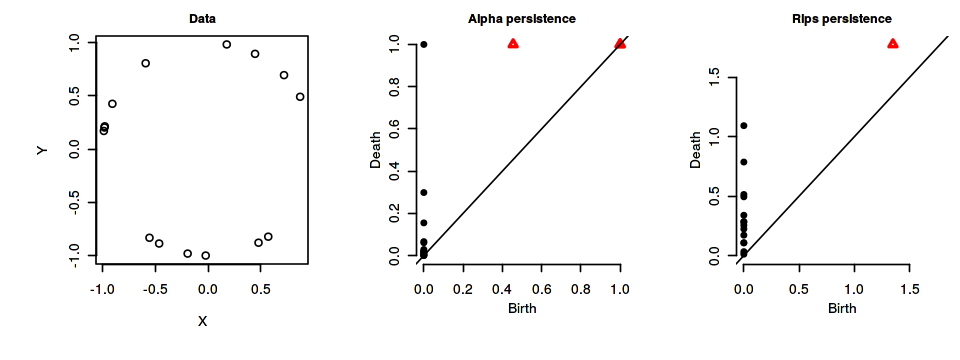

In [4]:
DiagAlphaCmplx = alphaComplexDiag(X, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(X, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(X, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

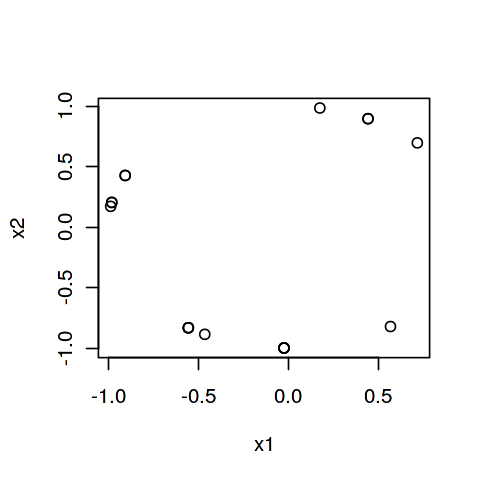

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [6]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 18

In [7]:
str(DiagAlphaCmplx$cycleLocation)

List of 18
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] 0.4442 -0.0225 0.8959 -0.9997
 $ : num [1:2, 1, 1:2] -0.5538 -0.0225 -0.8327 -0.9997
 $ : num [1:2, 1, 1:2] 0.718 0.444 0.696 0.896
 $ : num [1:2, 1, 1:2] 0.177 0.444 0.984 0.896
 $ : num [1:2, 1, 1:2] -0.463 -0.554 -0.887 -0.833
 $ : num [1:2, 1, 1:2] 0.569 -0.0225 -0.8224 -0.9997
 $ : num [1:2, 1, 1:2] -0.979 0.177 0.204 0.984
 $ : num [1:2, 1, 1:2] -0.985 -0.979 0.171 0.204
 $ : num [1:2, 1, 1:2] -0.193 -0.0225 -0.9812 -0.9997
 $ : num [1:2, 1, 1:2] 0.477 0.569 -0.879 -0.822
 $ : num [1:2, 1, 1:2] 0.87 0.718 0.492 0.696
 $ : num [1:2, 1, 1:2] -0.904 -0.979 0.427 0.204
 $ : num [1:2, 1, 1:2] -0.59 -0.904 0.807 0.427
 $ : num [1:2, 1, 1:2] -0.977 -0.979 0.215 0.204
 $ : num [1:15, 1:2, 1:2] 0.569 -0.5538 0.1766 -0.0225 -0.9045 ...
 $ : num [1:4, 1:2, 1:2] -0.4625 -0.0225 -0.4625 -0.0225 0.477 ...
 $ : num [1:8, 1:2, 1:2] -0.554 0.177 0.477 -0.59 -0.554 ...


In [8]:
DiagAlphaCmplx

$diagram
      dimension     Birth        Death
 [1,]         0 0.0000000          Inf
 [2,]         0 0.0000000 2.984826e-01
 [3,]         0 0.0000000 2.039908e-02
 [4,]         0 0.0000000 2.873993e-02
 [5,]         0 0.0000000 1.985414e-02
 [6,]         0 0.0000000 2.810450e-03
 [7,]         0 0.0000000 6.601643e-02
 [8,]         0 0.0000000 1.547162e-01
 [9,]         0 0.0000000 2.709519e-04
[10,]         0 0.0000000 7.351206e-03
[11,]         0 0.0000000 2.916668e-03
[12,]         0 0.0000000 1.616149e-02
[13,]         0 0.0000000 1.250800e-02
[14,]         0 0.0000000 6.101145e-02
[15,]         0 0.0000000 3.295547e-05
[16,]         1 0.4548664 1.000000e+00
[17,]         1 1.0000000 1.000000e+00
[18,]         1 1.0000000 1.000000e+00

$birthLocation
               x1         x2
 [1,] -0.02251843 -0.9997464
 [2,]  0.44420949  0.8959229
 [3,] -0.55379698 -0.8326517
 [4,]  0.71804845  0.6959931
 [5,]  0.17661010  0.9842809
 [6,] -0.46252444 -0.8866065
 [7,]  0.56896500 -0.8223617
 [

#### Plot merging events for connected components (dim 0 homology)

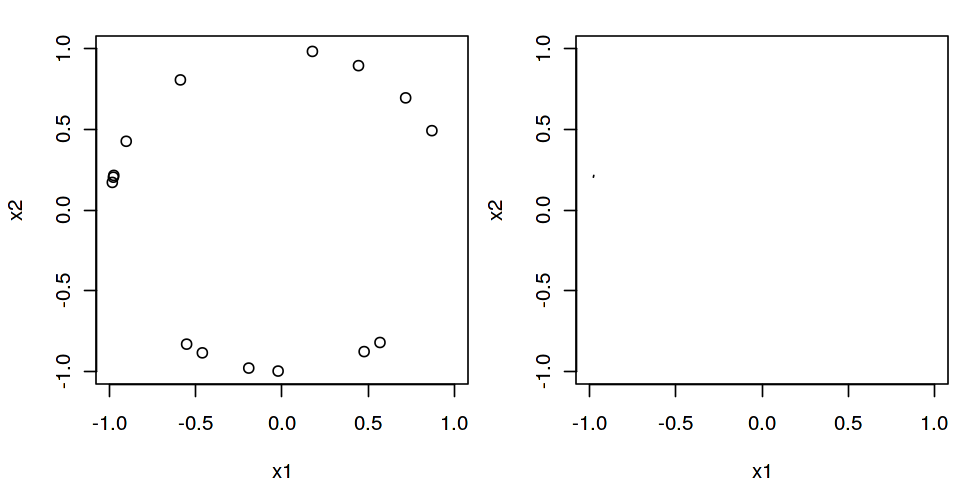

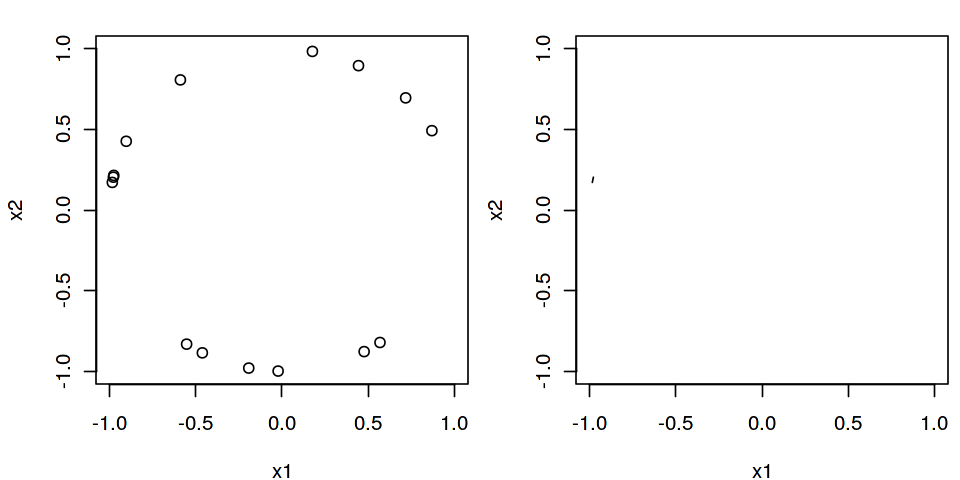

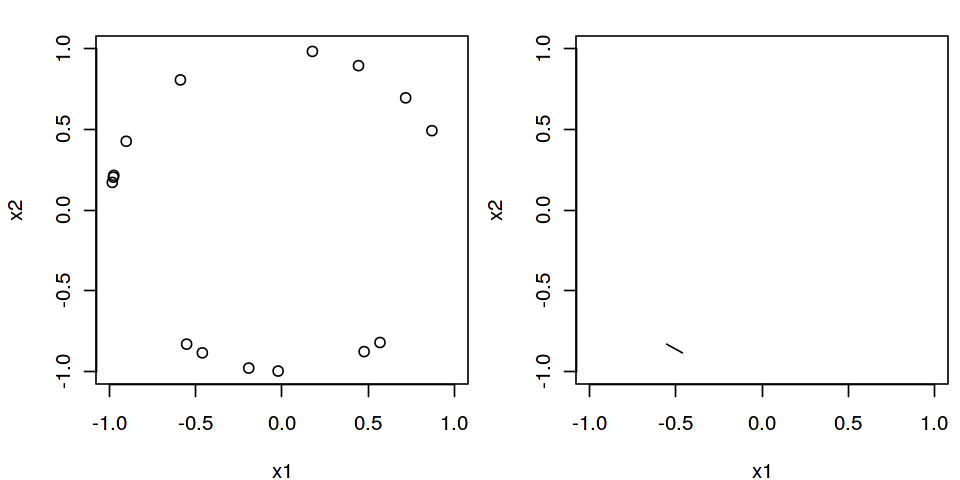

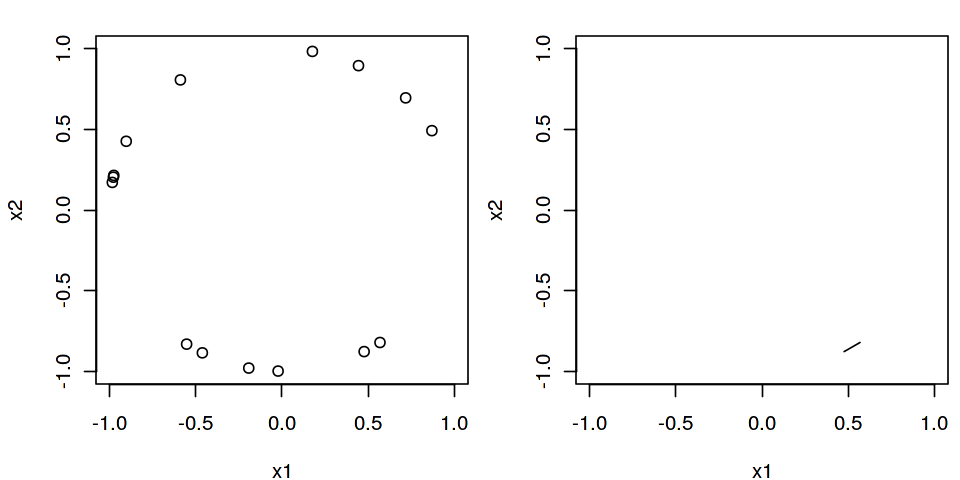

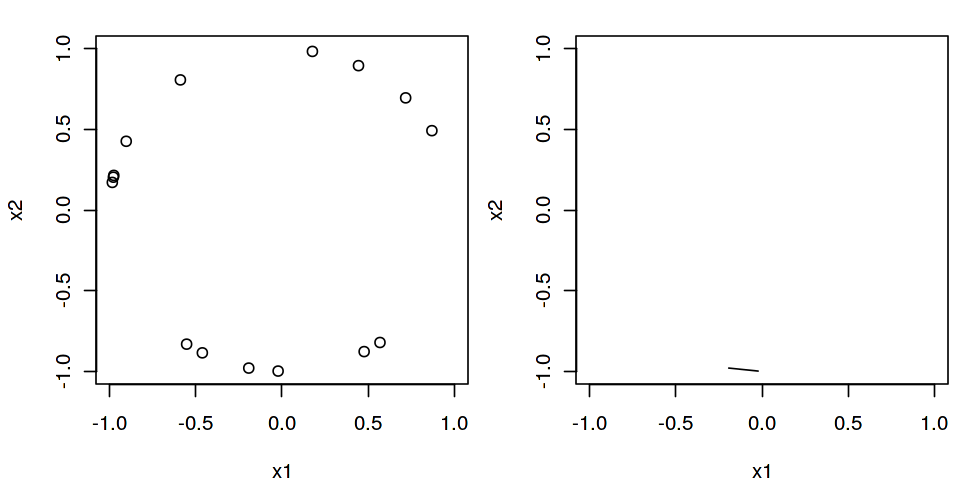

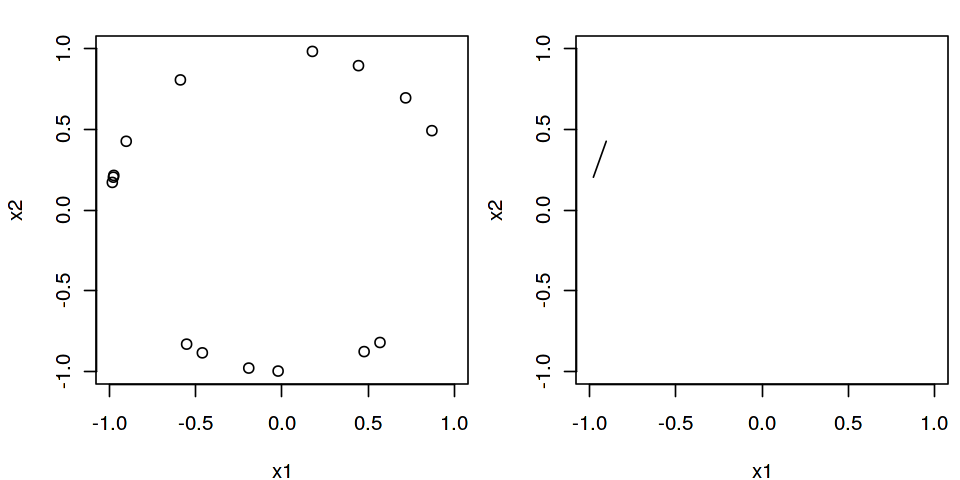

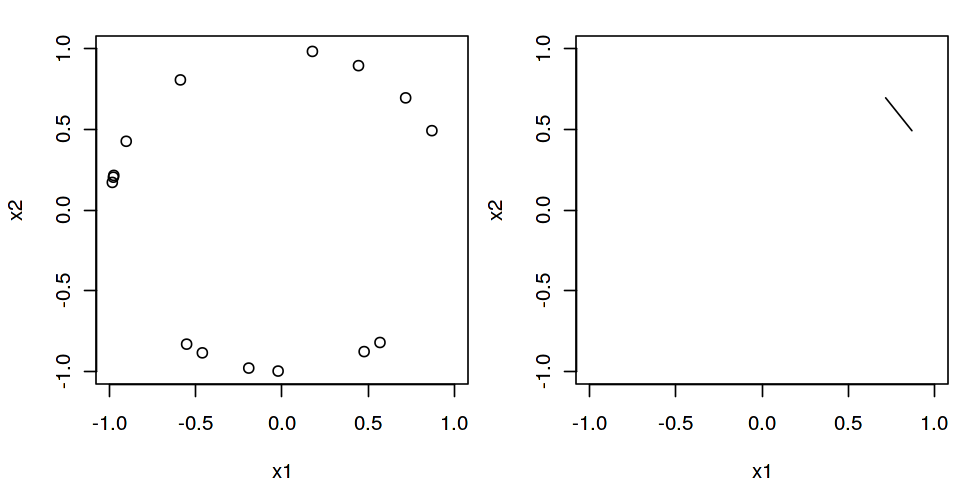

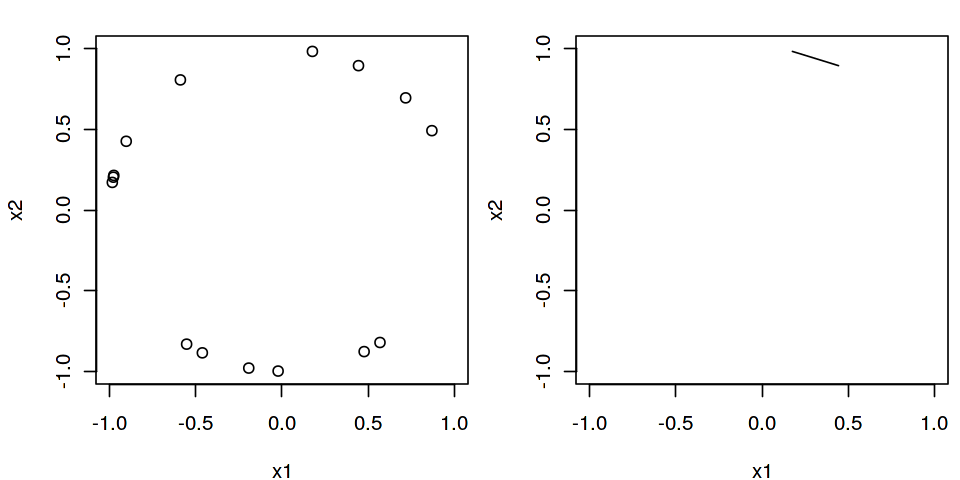

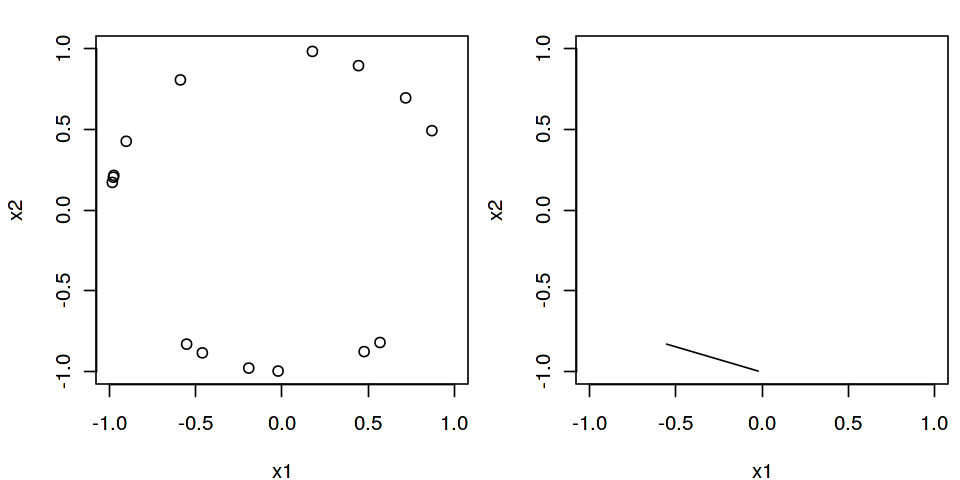

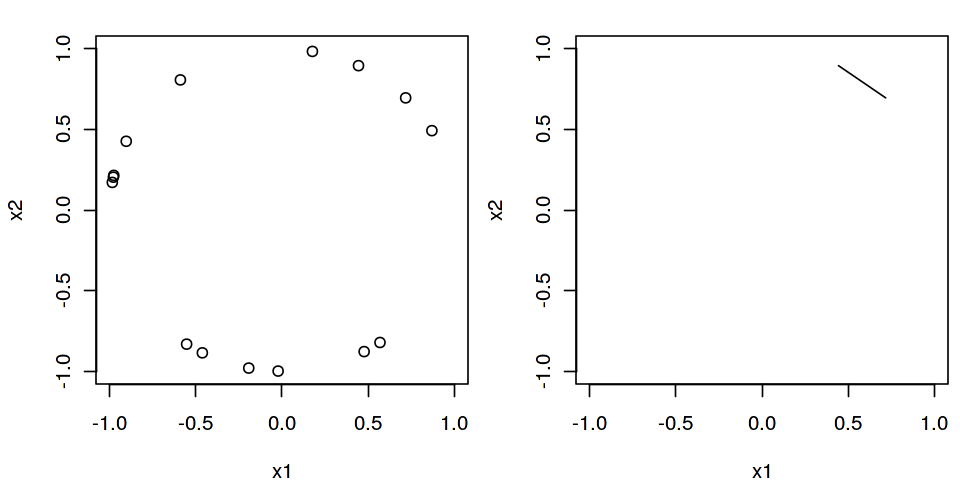

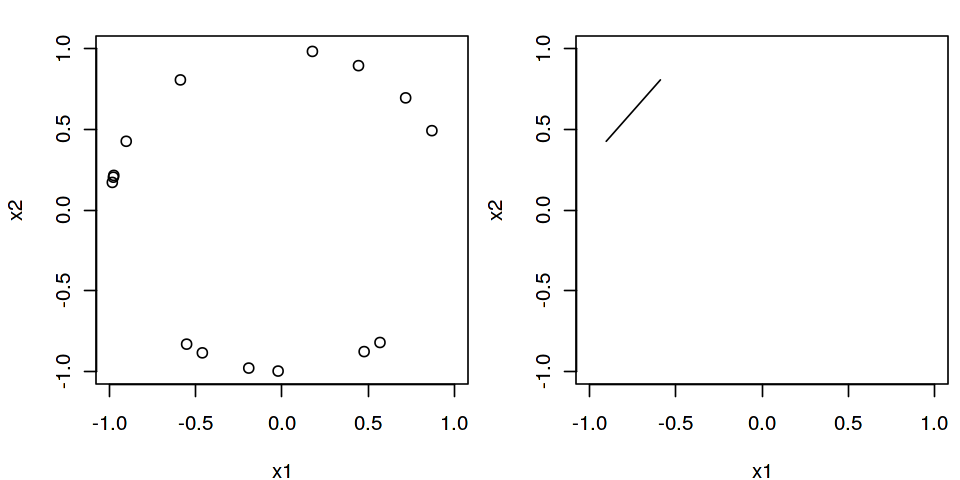

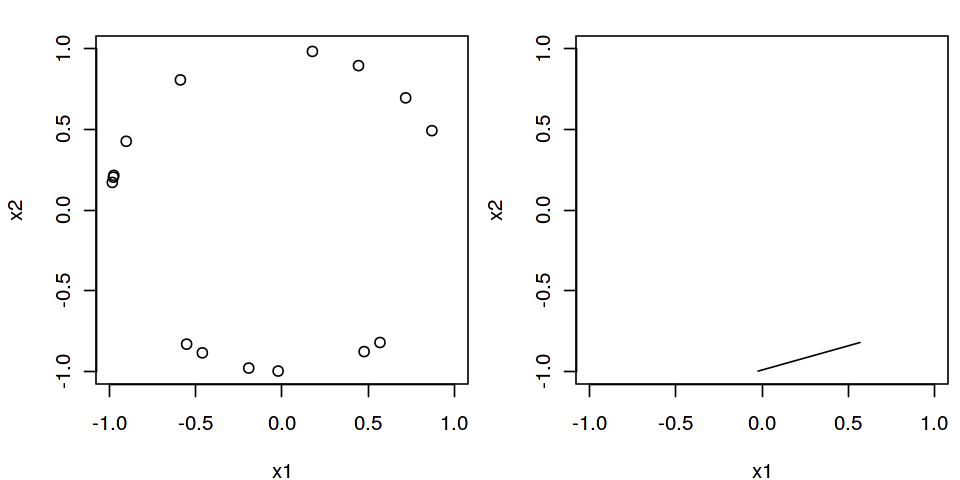

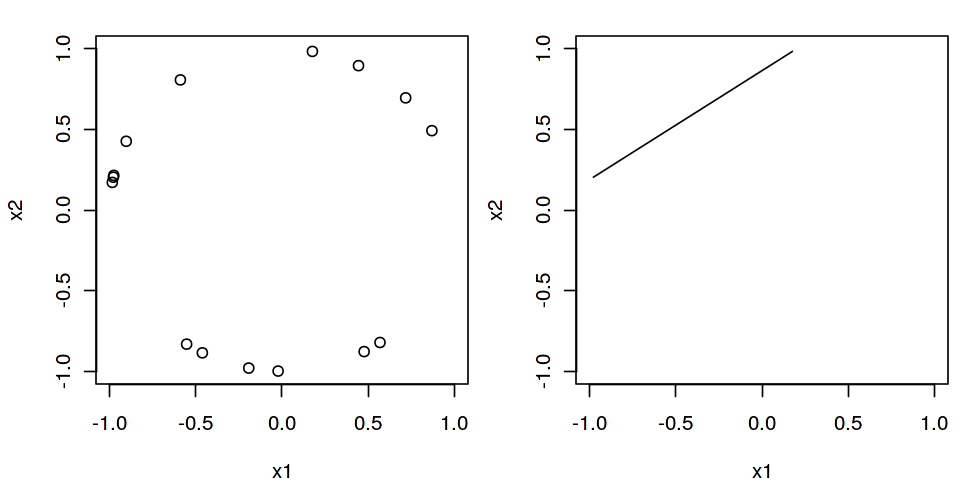

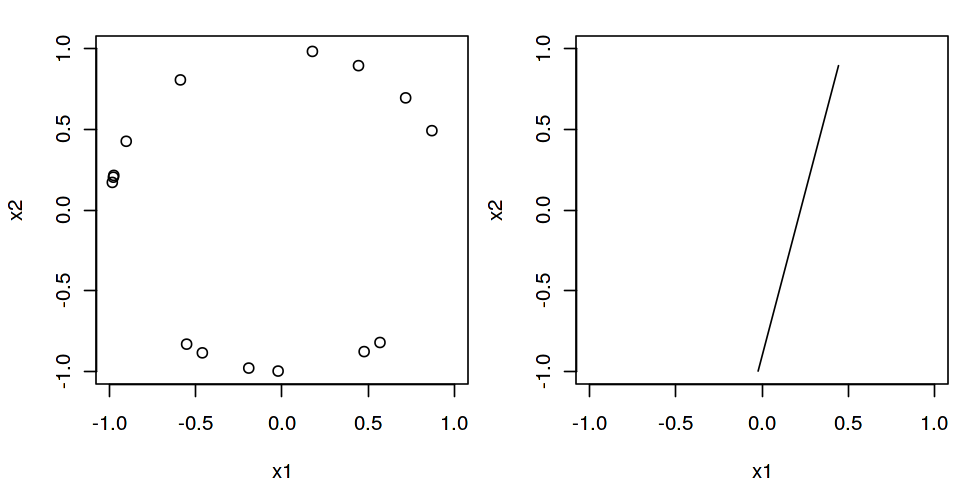

In [9]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 1){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Plot loop closing events (dim 1 homology)

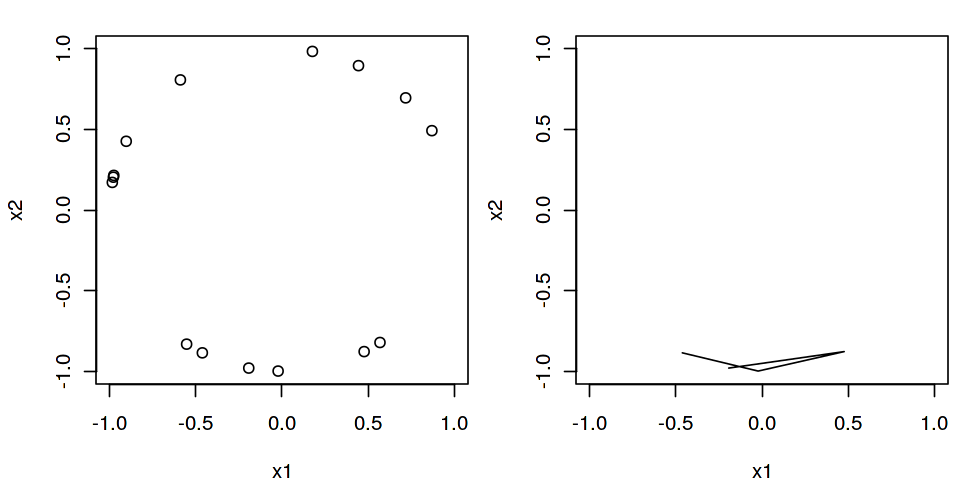

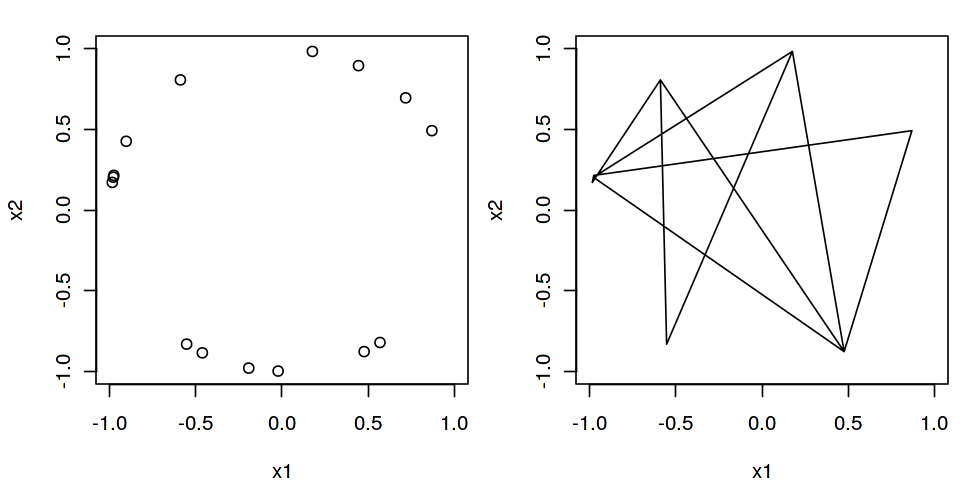

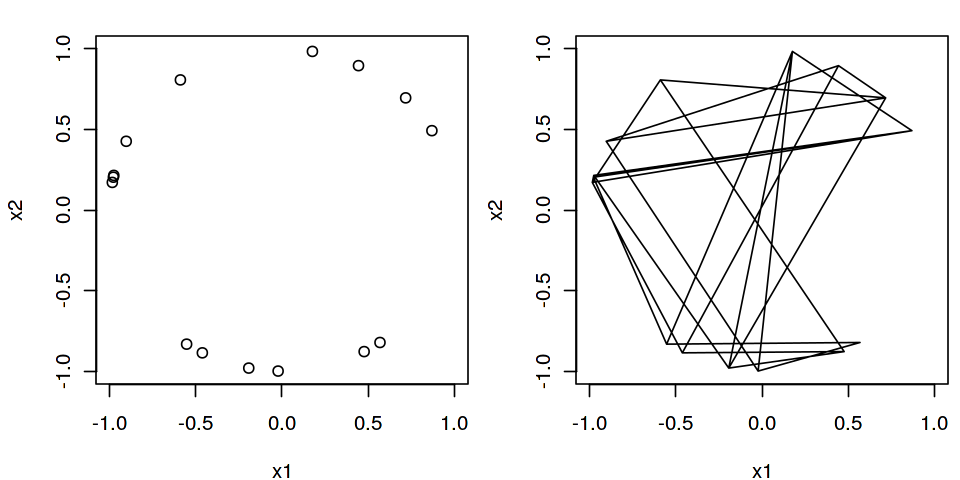

In [10]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Synthetic Data: Points located on two circles

In [11]:
Circle1 <- circleUnif(60)
Circle2 <- circleUnif(60, r = 2) + 3
Circles <- rbind(Circle1, Circle2)
d1 = circleUnif(60,r=2)

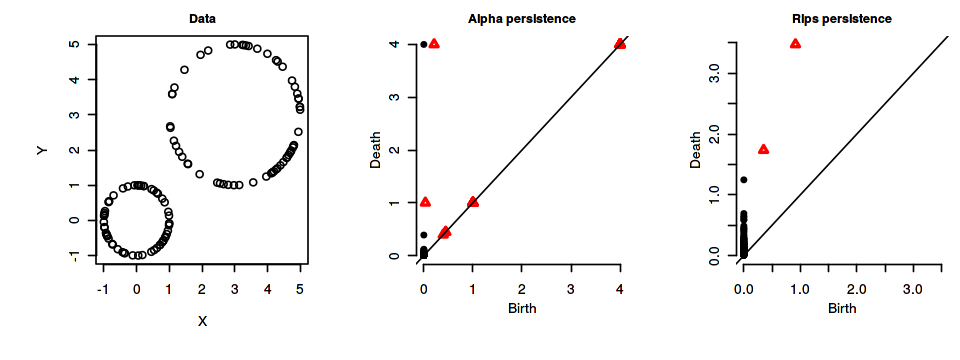

In [12]:
DiagAlphaCmplx = alphaComplexDiag(Circles, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(Circles, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

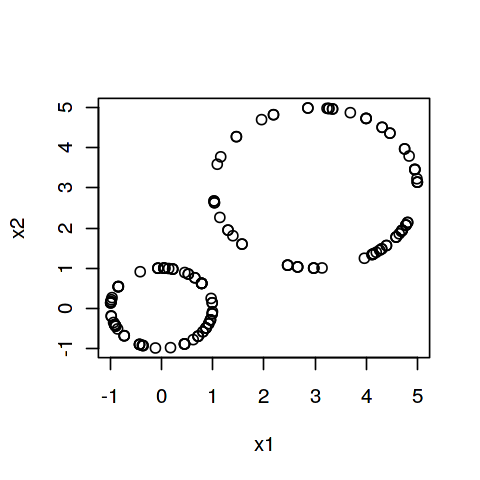

In [13]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [14]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 157

In [15]:
str(DiagAlphaCmplx$cycleLocation)

List of 157
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] -0.9891 0.0478 0.147 0.9989
 $ : num [1:2, 1, 1:2] -0.912 -0.989 -0.409 0.147
 $ : num [1:2, 1, 1:2] 0.45 -0.912 -0.893 -0.409
 $ : num [1:2, 1, 1:2] 0.714 0.45 -0.7 -0.893
 $ : num [1:2, 1, 1:2] -0.986 -0.989 0.168 0.147
 $ : num [1:2, 1, 1:2] 0.99 0.714 -0.14 -0.7
 $ : num [1:2, 1, 1:2] -0.909 -0.912 -0.416 -0.409
 $ : num [1:2, 1, 1:2] -0.978 -0.986 0.211 0.168
 $ : num [1:2, 1, 1:2] -0.844 -0.978 0.537 0.211
 $ : num [1:2, 1, 1:2] -0.428 -0.909 -0.904 -0.416
 $ : num [1:2, 1, 1:2] 0.7853 0.0478 0.6191 0.9989
 $ : num [1:2, 1, 1:2] -0.0688 0.0478 0.9976 0.9989
 $ : num [1:2, 1, 1:2] 0.2218 0.0478 0.9751 0.9989
 $ : num [1:2, 1, 1:2] 0.87 0.714 -0.493 -0.7
 $ : num [1:2, 1, 1:2] -0.991 -0.989 0.132 0.147
 $ : num [1:2, 1, 1:2] 0.956 0.87 -0.292 -0.493
 $ : num [1:2, 1, 1:2] 0.718 0.714 -0.696 -0.7
 $ : num [1:2, 1, 1:2] 0.62 0.45 -0.785 -0.893
 $ : num [1:2, 1, 1:2] -0.4147 -0.0688 0.9099 0.9976
 $ : num [1:2, 1, 1:2] -0.894 -

In [16]:
DiagAlphaCmplx

$diagram
       dimension      Birth        Death
  [1,]         0 0.00000000          Inf
  [2,]         0 0.00000000 2.133636e-02
  [3,]         0 0.00000000 7.806830e-03
  [4,]         0 0.00000000 2.080011e-02
  [5,]         0 0.00000000 4.039571e-03
  [6,]         0 0.00000000 1.104049e-04
  [7,]         0 0.00000000 6.112353e-03
  [8,]         0 0.00000000 1.412487e-05
  [9,]         0 0.00000000 4.777480e-04
 [10,]         0 0.00000000 1.941440e-02
 [11,]         0 0.00000000 1.012405e-02
 [12,]         0 0.00000000 1.540641e-02
 [13,]         0 0.00000000 2.360684e-03
 [14,]         0 0.00000000 1.508854e-03
 [15,]         0 0.00000000 2.463017e-03
 [16,]         0 0.00000000 6.046504e-05
 [17,]         0 0.00000000 2.628265e-03
 [18,]         0 0.00000000 7.021011e-06
 [19,]         0 0.00000000 2.617093e-03
 [20,]         0 0.00000000 1.006564e-02
 [21,]         0 0.00000000 1.648008e-04
 [22,]         0 0.00000000 6.599460e-04
 [23,]         0 0.00000000 1.884534e-03
 [24,] 

#### Plot loop closing events

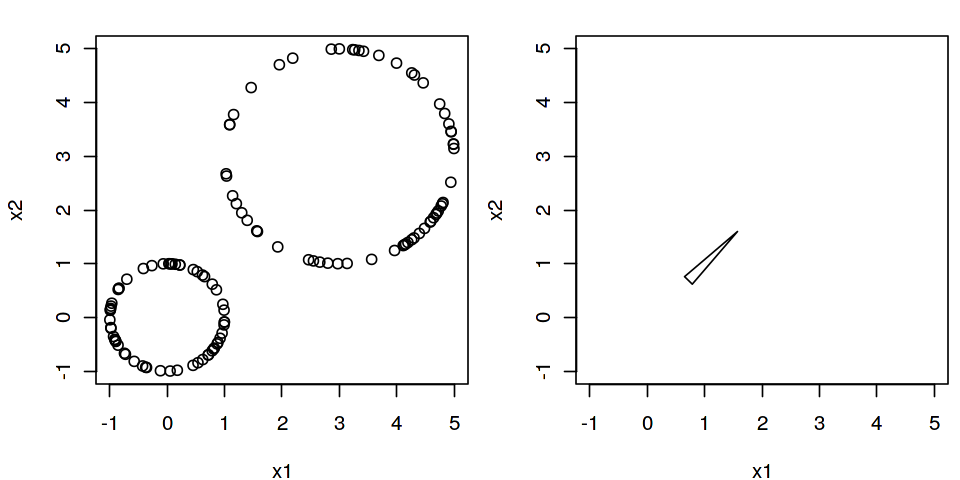

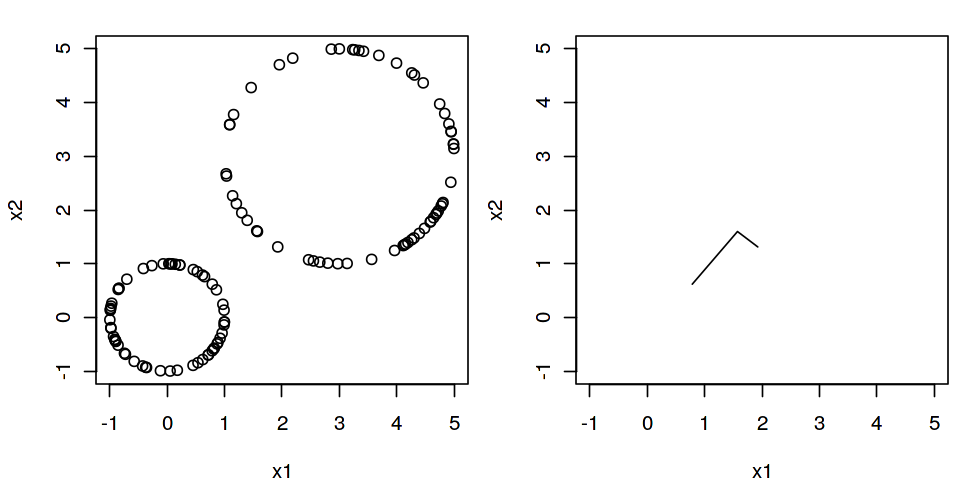

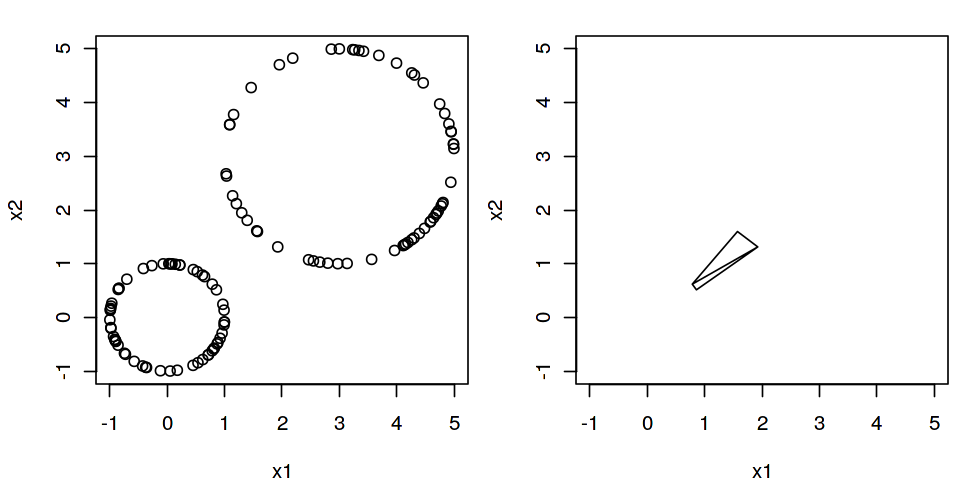

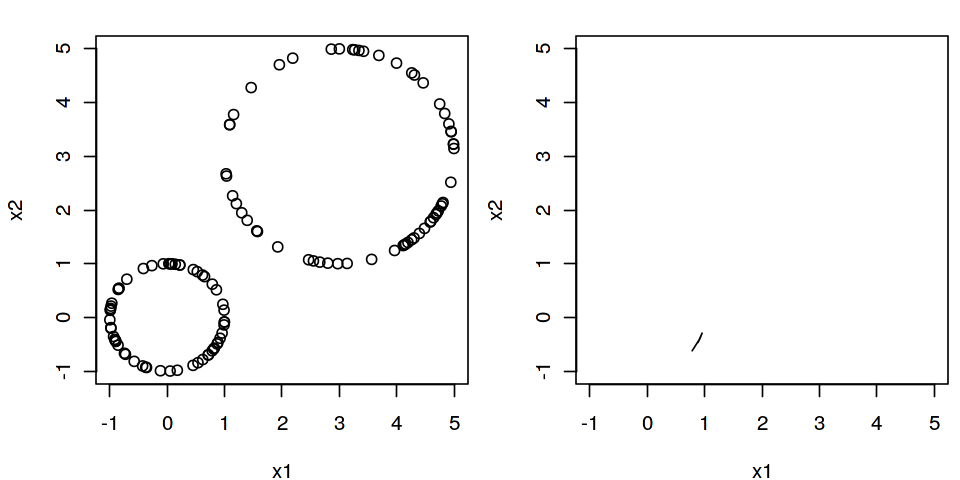

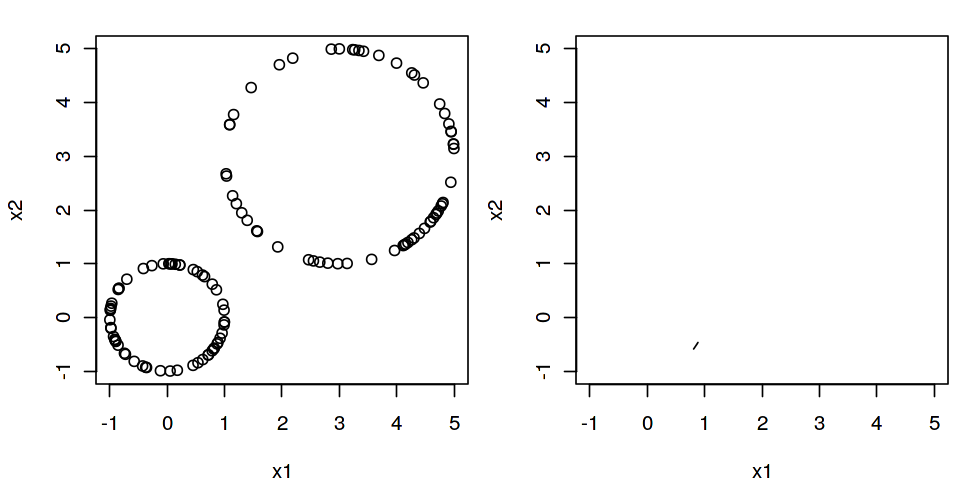

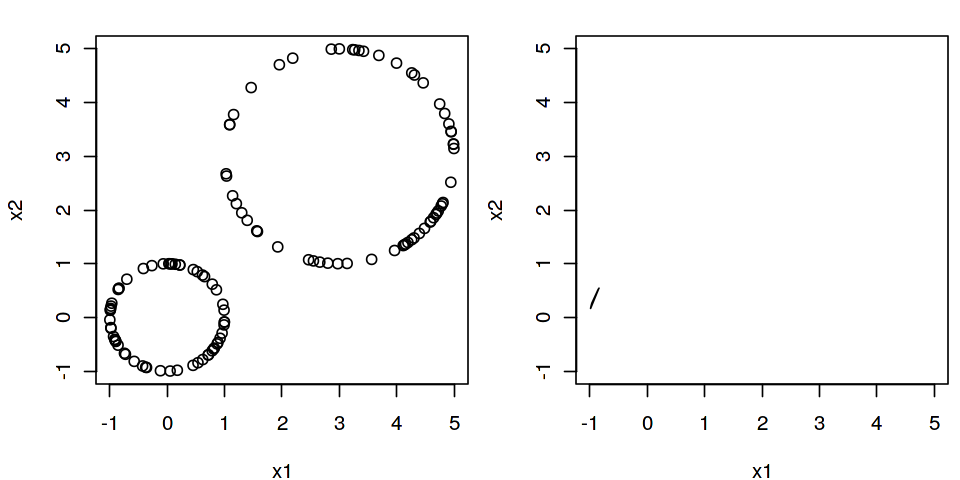

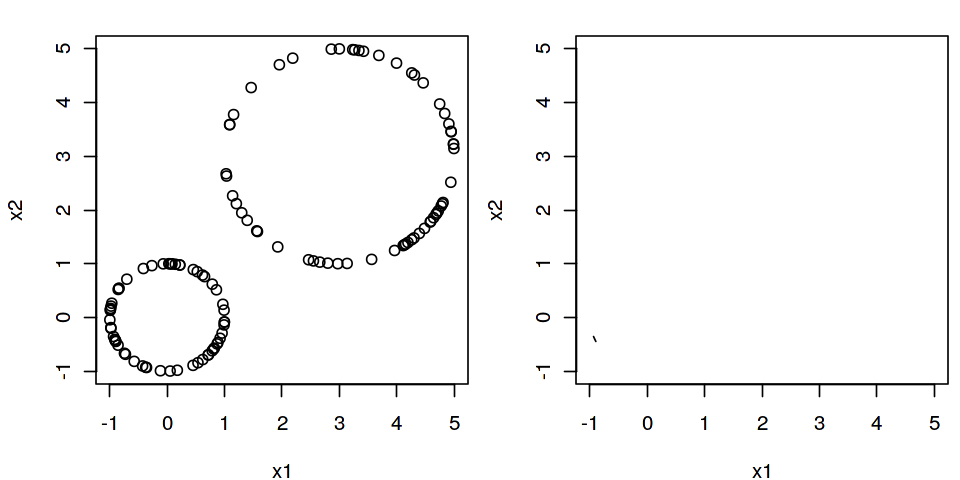

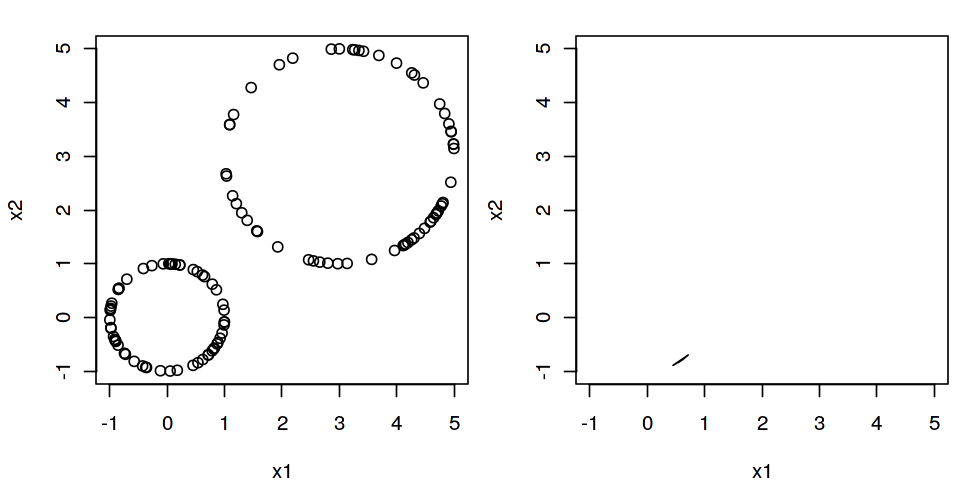

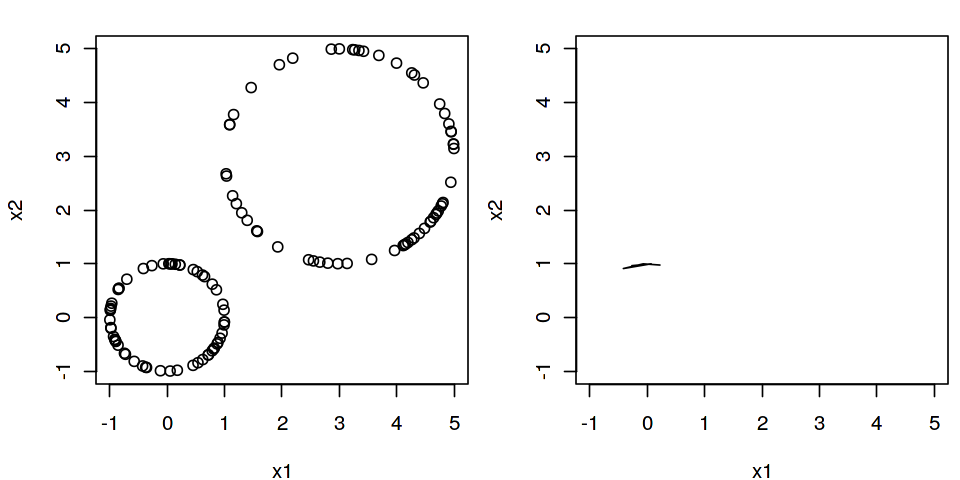

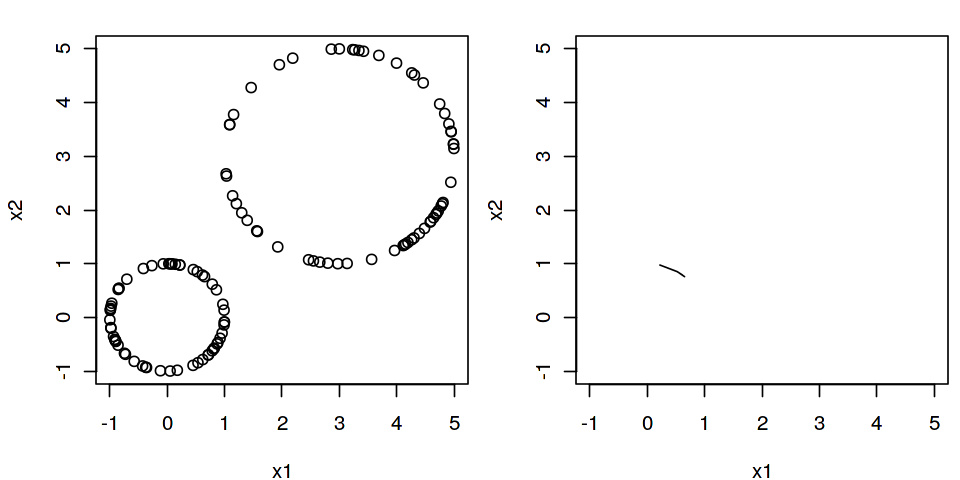

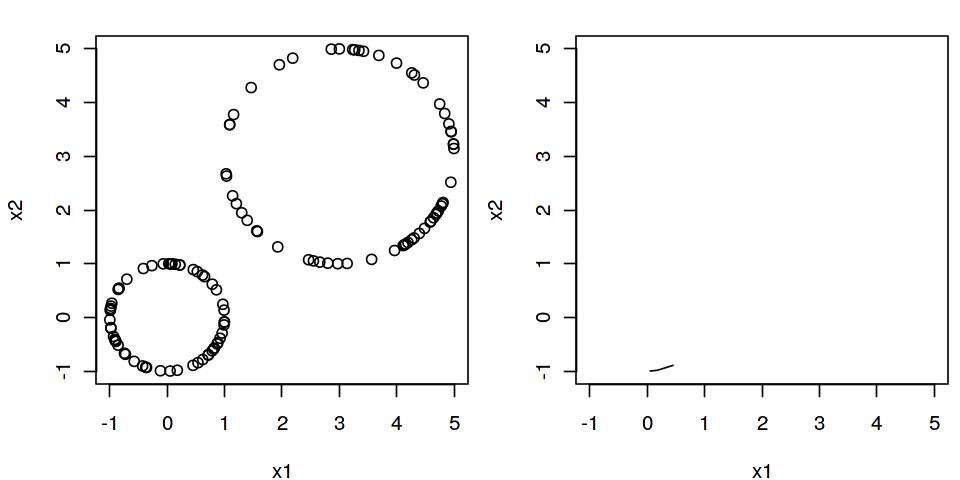

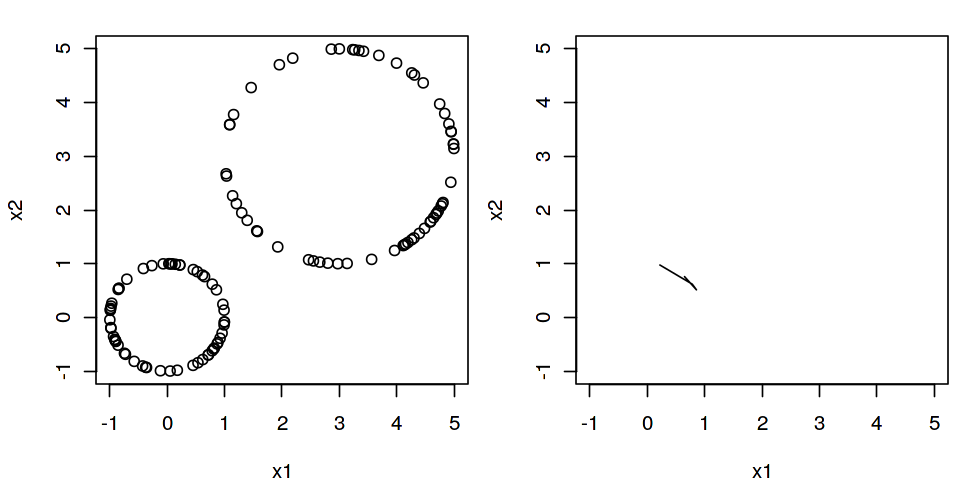

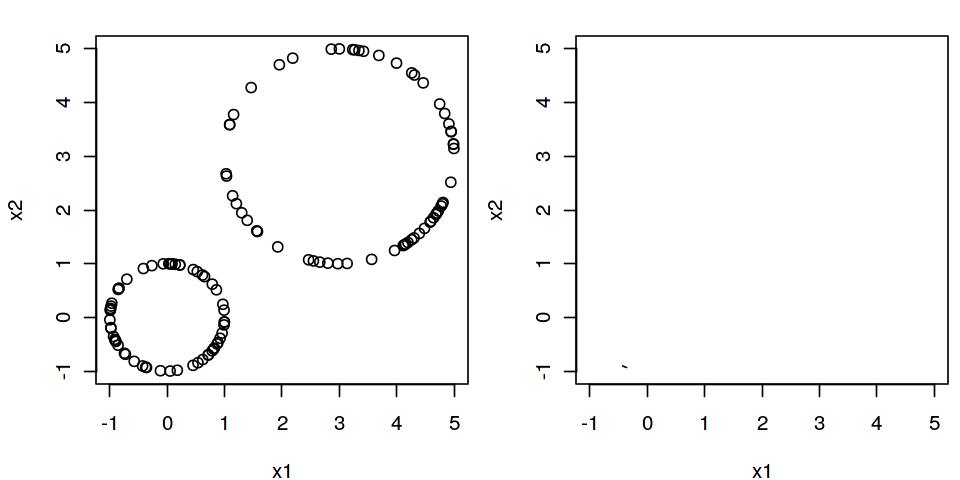

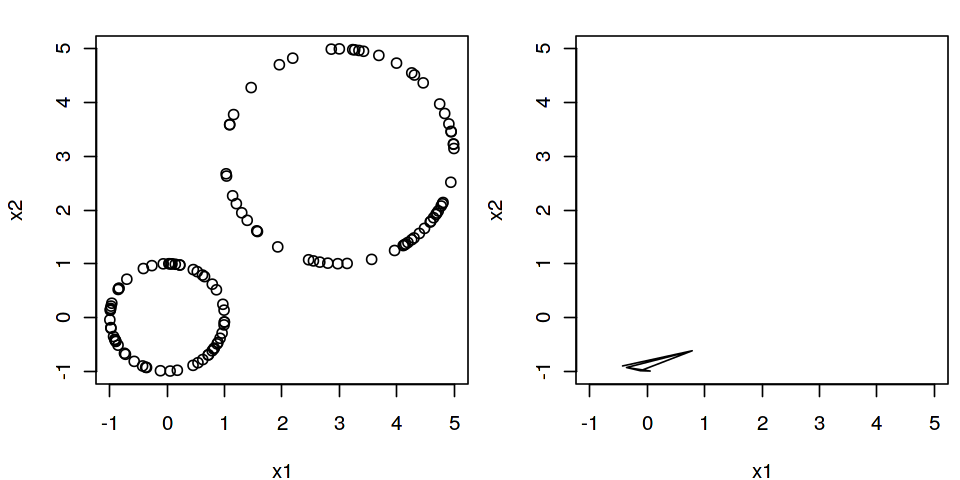

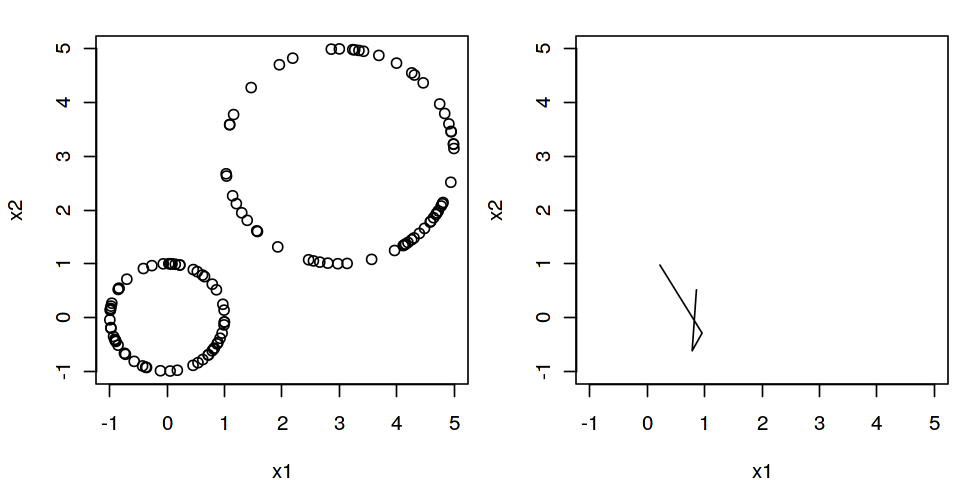

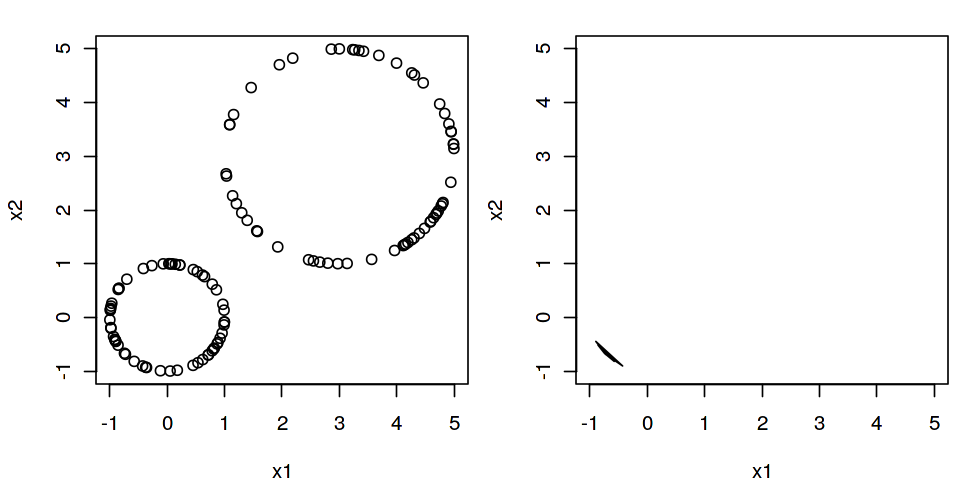

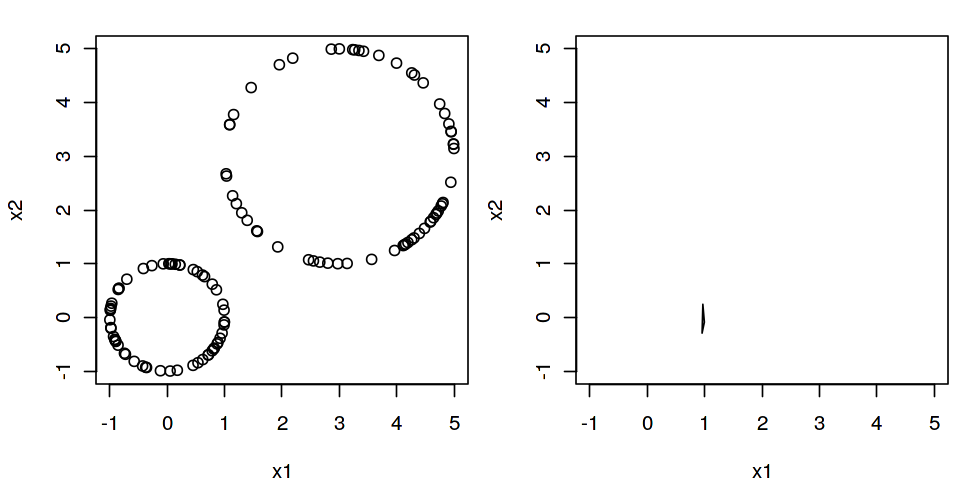

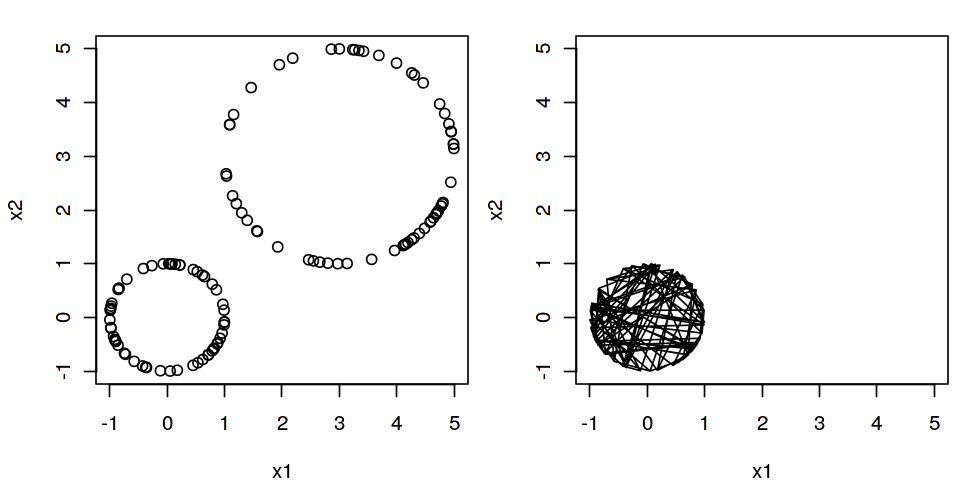

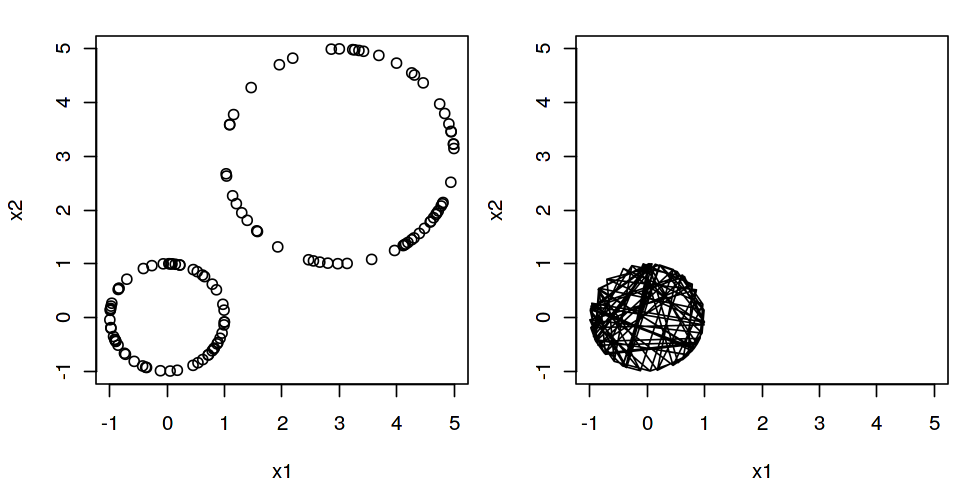

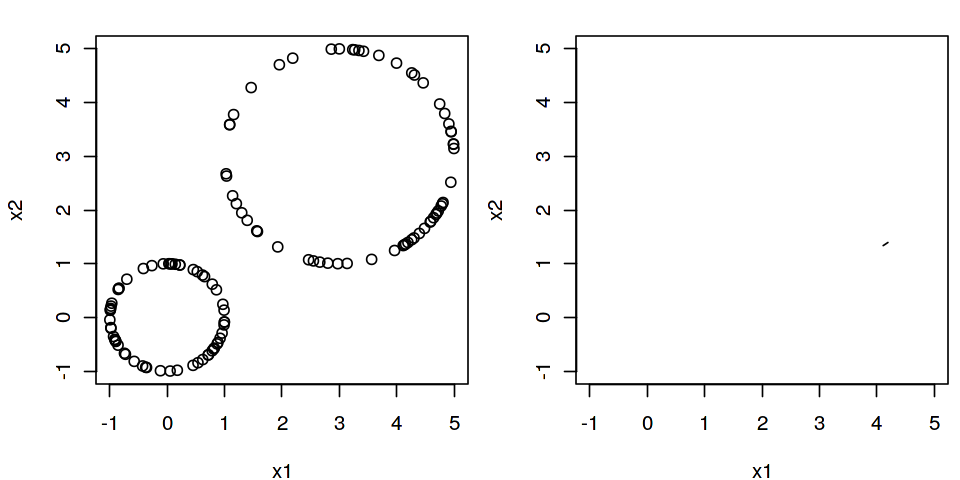

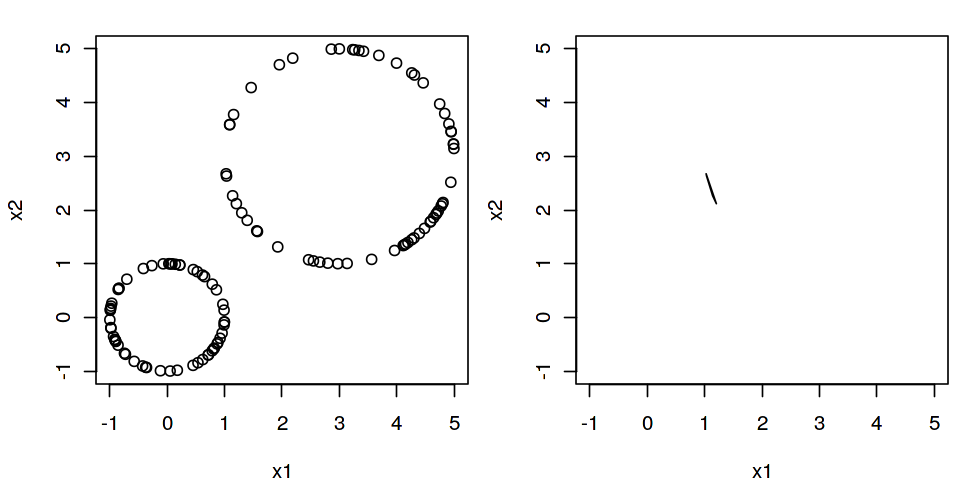

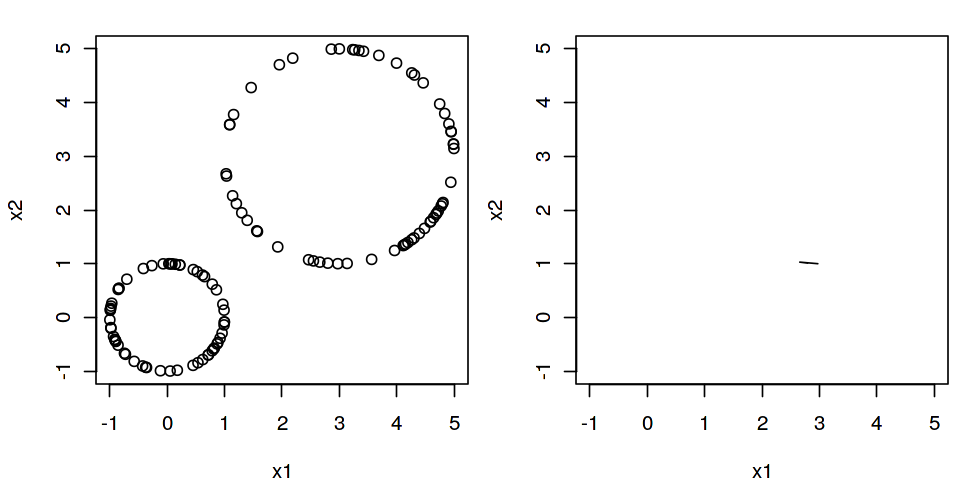

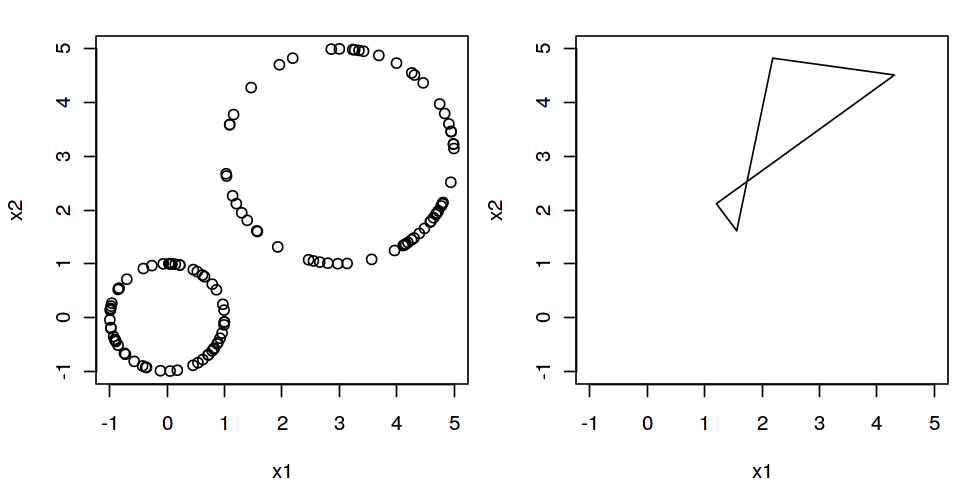

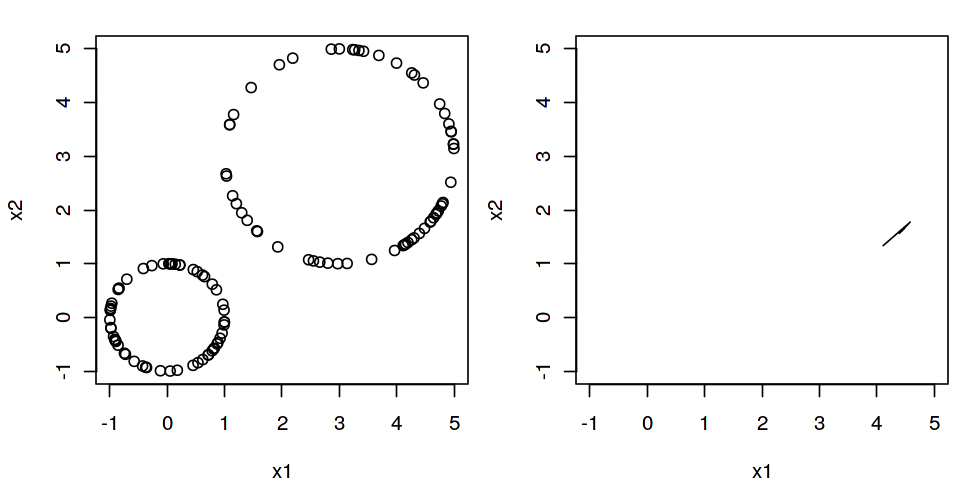

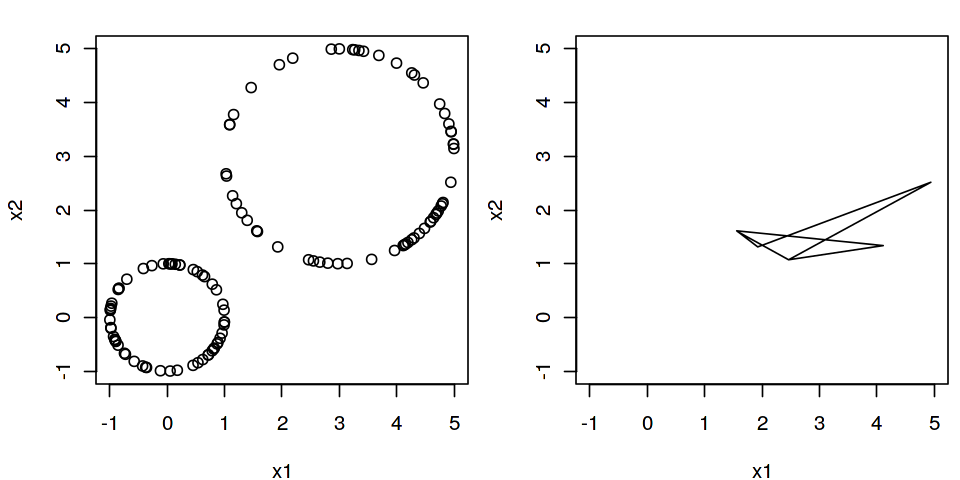

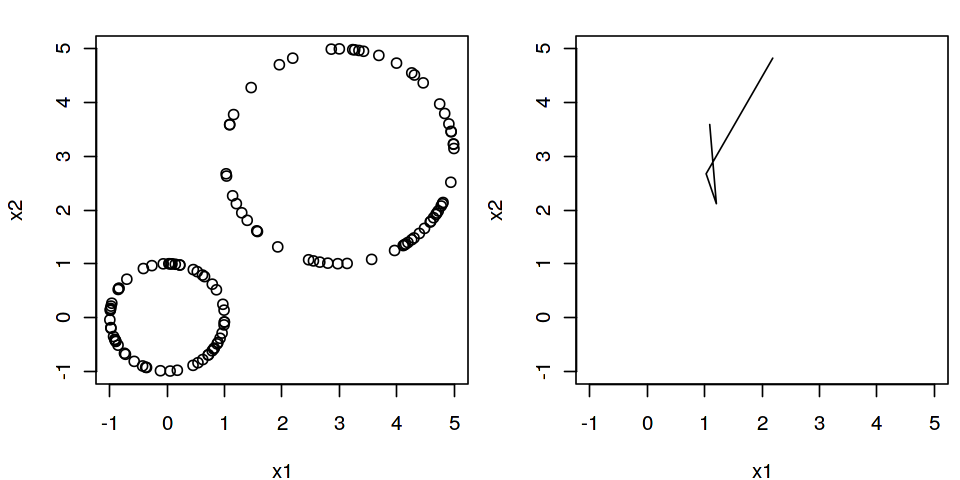

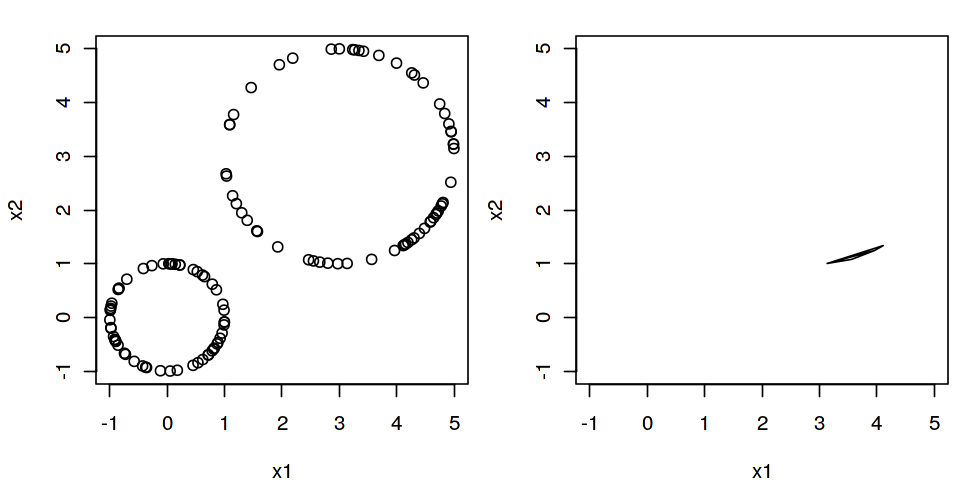

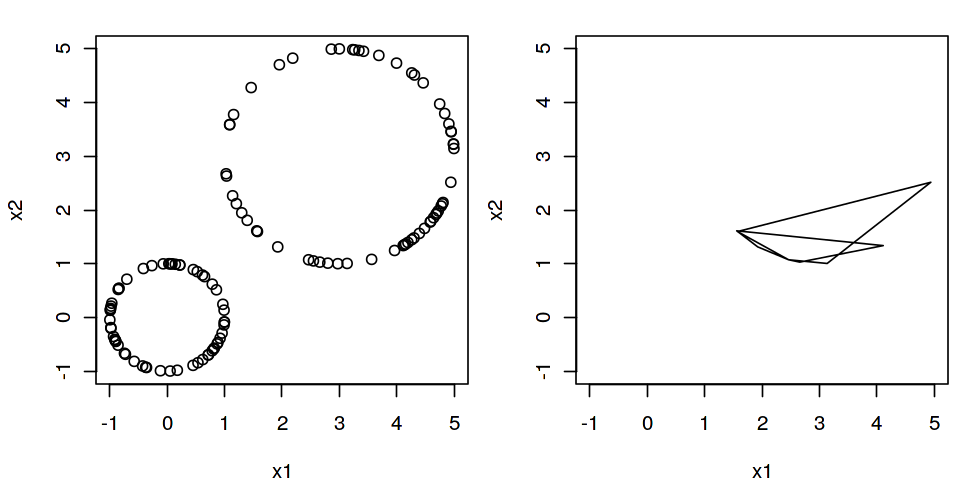

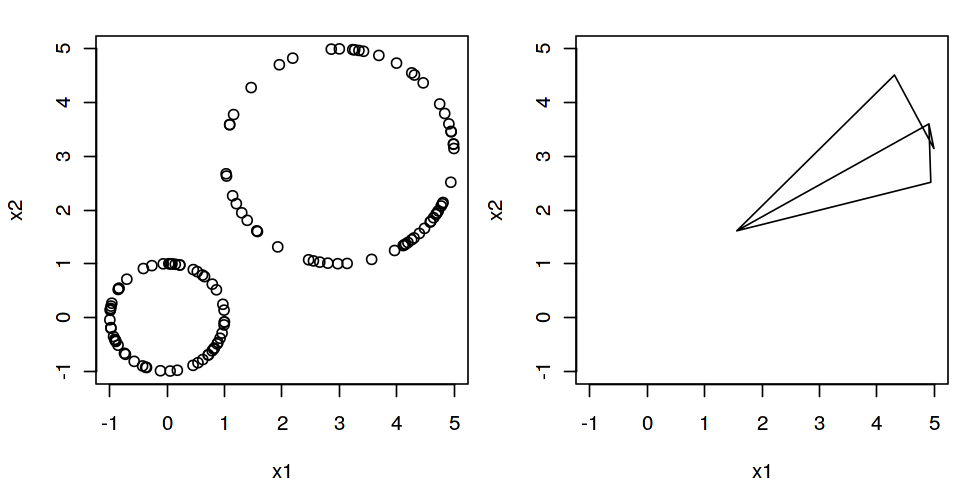

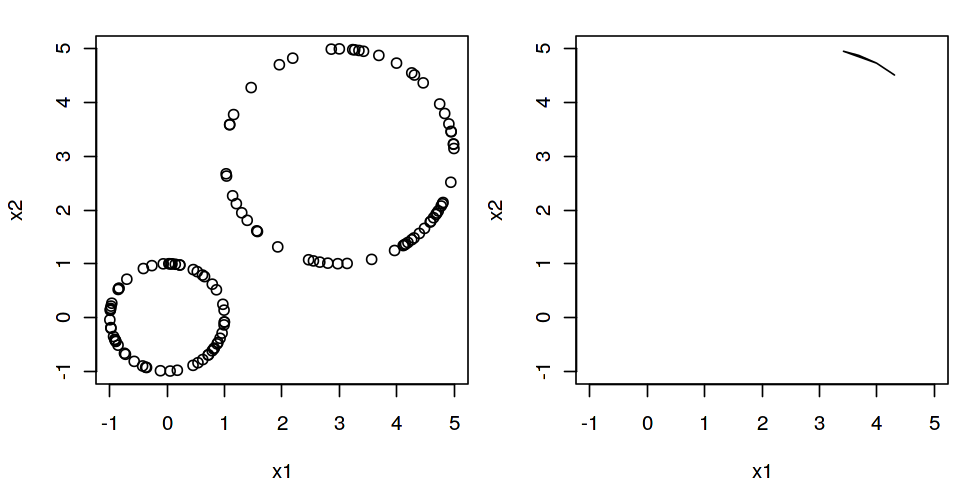

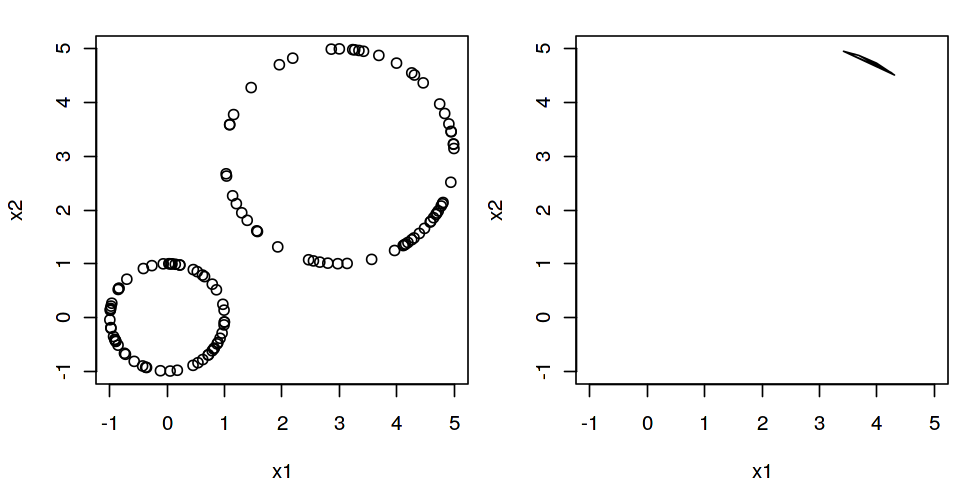

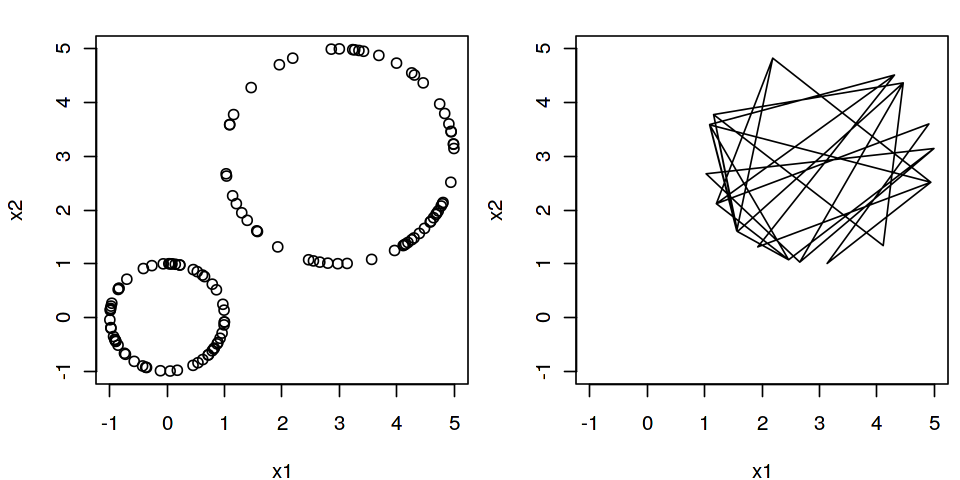

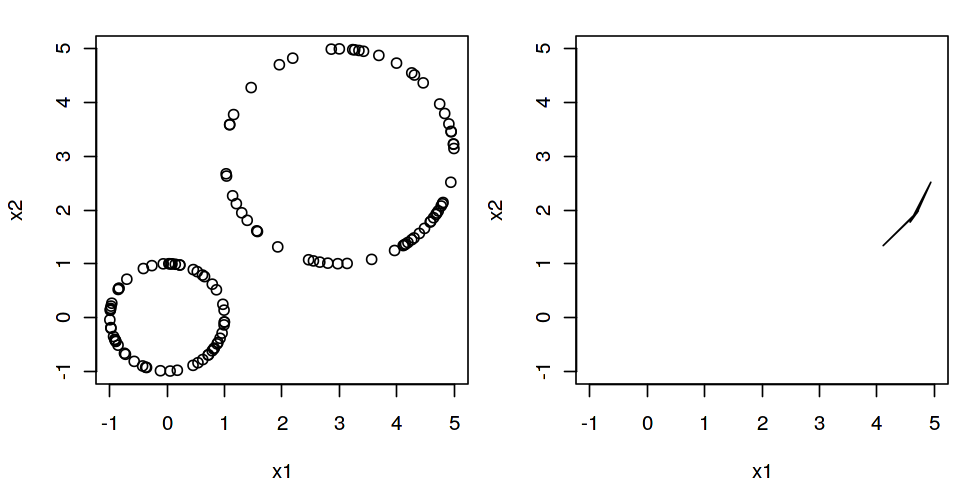

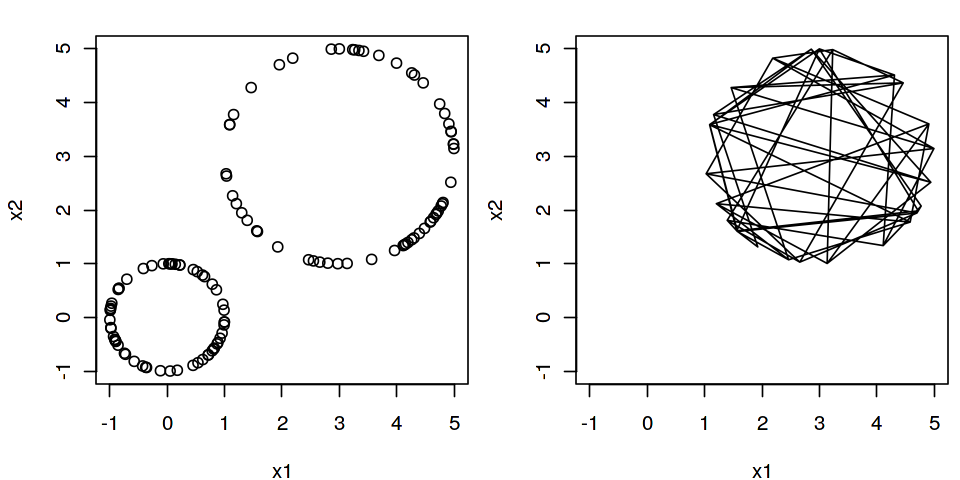

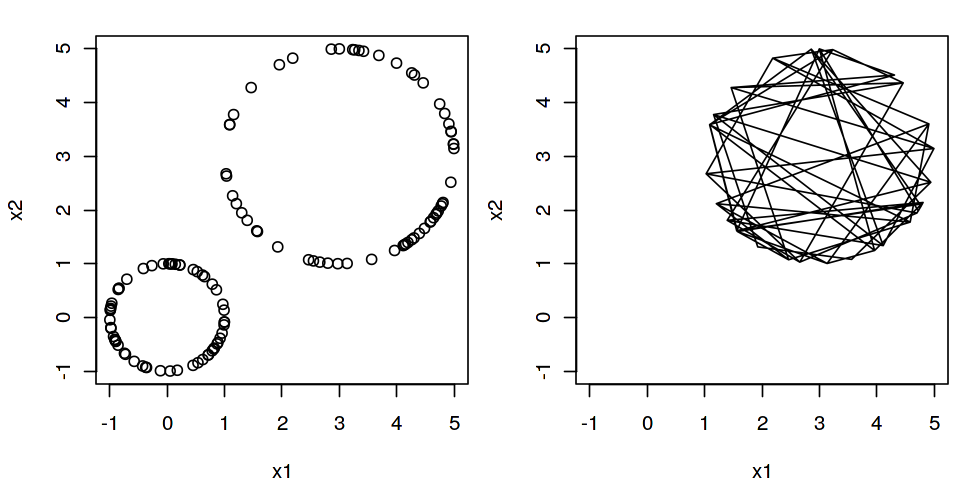

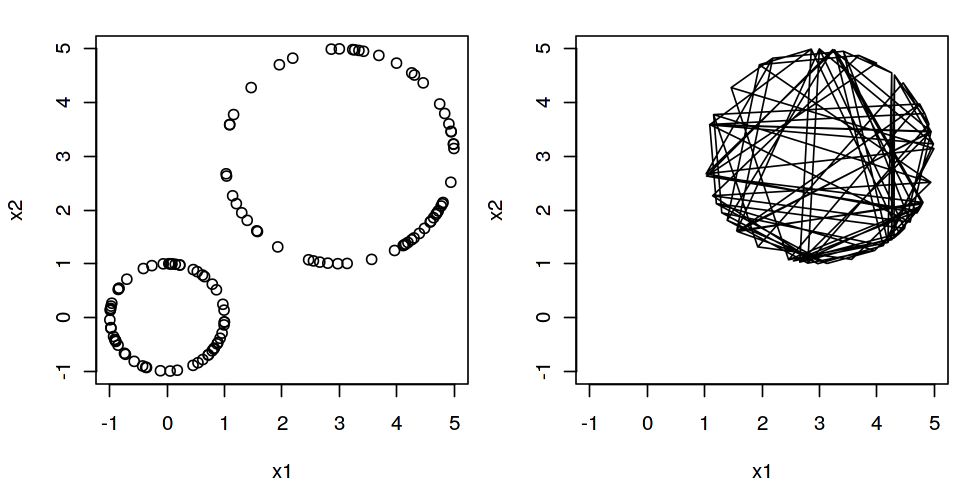

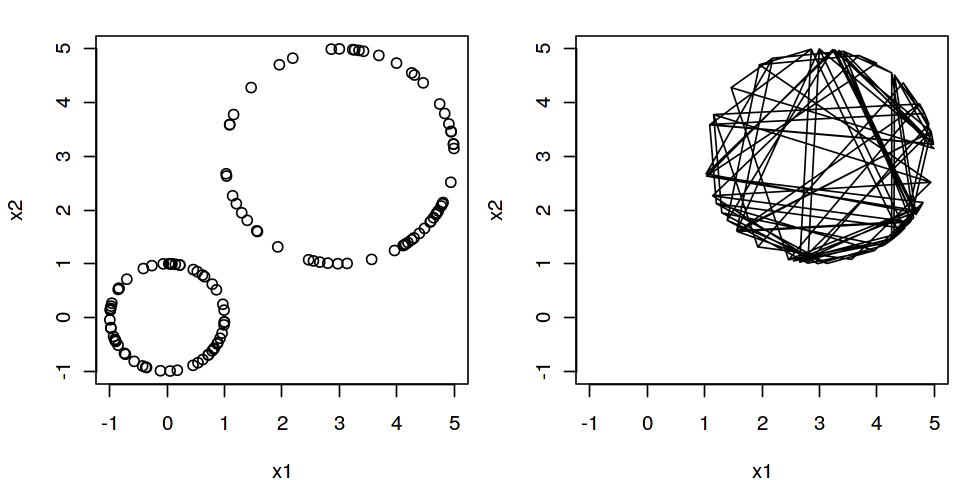

In [17]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(Circles, xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
    }
    
}

x.hull,y.hull
4.48264258,1.65769937
4.39204651,1.56396152
4.29921235,1.47945823
4.25905684,1.44604509
4.19329353,1.39499204
4.15242153,1.36539772
4.13262748,1.35162050
4.11122049,1.33711425
0.53637676,-0.84397866
0.45043243,-0.89281052


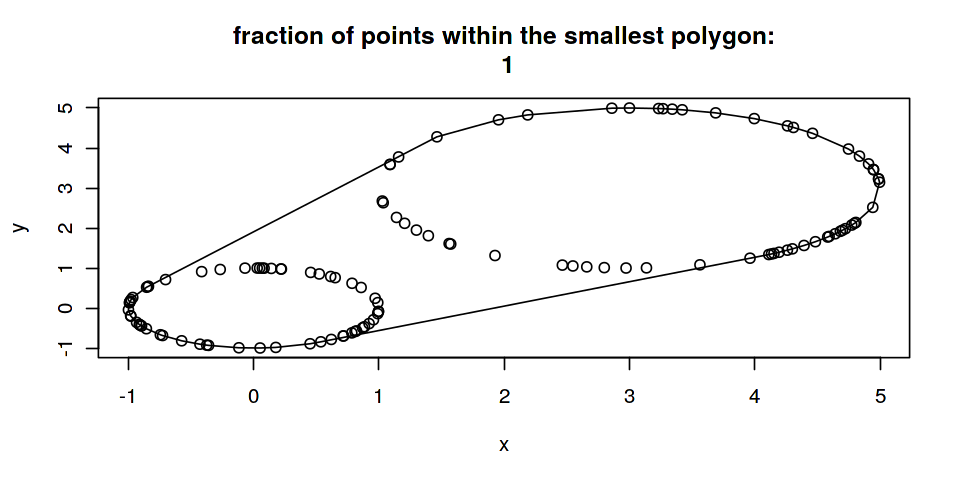

In [18]:
library(aplpack)
#options(repr.plot.width=3, repr.plot.height=3)
#plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plothulls(Circles)

#### Rips filtration
- The following function computes the subset of the rips barcode based on epsilon duration present
- Intake is the output format from ripser and a filtration length value gamma

In [19]:
duration_filter = function(rips_homology,gamma){
    rips_duration = rips_homology[,3]-rips_homology[,2]
    rips_homology2 = cbind(rips_homology,rips_duration)
    g = rips_homology2[,4]>gamma
    rips_homology2 = rips_homology2[g,]
    return(rips_homology2)
}

In [20]:
rip_check = duration_filter(rips_homology,0.5)
print(rip_check)

     dimension    Birth    Death rips_duration
[1,]         0 0.000000 0.588302      0.588302
[2,]         0 0.000000 0.588581      0.588581
[3,]         0 0.000000 0.630752      0.630752
[4,]         0 0.000000 0.649654      0.649654
[5,]         0 0.000000 0.691919      0.691919
[6,]         0 0.000000 1.246550      1.246550
[7,]         1 0.914000 3.475510      2.561510
[8,]         1 0.349869 1.735880      1.386011


#### Rips Computation AND Filtration
- Integrated in one function for ease of use

In [21]:
compute_rips = function(data,maxDim,epsThresh,gamma){
    homology_data = ripserDiag(data,maxDim,epsThresh)
    homology_data = duration_filter(homology_data,gamma)
    return(homology_data)
}

In [22]:
FR = compute_rips(Circles,1,10,0.5)
print(FR)

     dimension    Birth    Death rips_duration
[1,]         0 0.000000 0.588302      0.588302
[2,]         0 0.000000 0.588581      0.588581
[3,]         0 0.000000 0.630752      0.630752
[4,]         0 0.000000 0.649654      0.649654
[5,]         0 0.000000 0.691919      0.691919
[6,]         0 0.000000 1.246550      1.246550
[7,]         1 0.914000 3.475510      2.561510
[8,]         1 0.349869 1.735880      1.386011


#### Nearest Neighbor matching implmentation
- Function: Intake points from alpha filtration and rips complex and match them using a nearest neighbor algorithm
- We intake the RIPS values as p1 and the Alpha values as p2 and perform a matching process to yield the correspondence between the two
- Rips data should generally be filtered before running this function


In [33]:
match_pts = function(p1,p2){
    if (nrow(p1) > (nrow(p2))){
        stop('RIPS MATRIX MUST CONTAIN FEWER FEATURES',call = TRUE, domain == NULL)
        geterrormessage()
    }
    
    #create a matrix in which to store distance values
    dx = matrix(,nrow(p1),nrow(p2))
    for (i in 1:nrow(p1)){
        for (j in 1:nrow(p2)){
            dx[i,j] = sqrt((p2[j,1]-p1[i,1])^2+(p2[j,2]-p1[i,2])^2)
        }
    }
   
    #create a matrix to store the match list
    store_match = matrix(,nrow(p1),1)
    for (i in 1:nrow(p1)){
        store_match[i,1]=which.min(dx[i,])
    }
    
    #reassign and return values
    f1 = p1
    f2 = p2[store_match,]
    out = list("Set1",f1,"Set2",f2,"MatchIx",store_match)
    return(out)
    
}

In [34]:
g1 = matrix(c(2.87,1.38,3.77,1.75),nrow=2,ncol=2)
g2 = matrix(c(0.48,2.06,1,4),nrow=2,ncol=2)
print(g1)
print(g2)
out = match_pts(g1,g2)
print(out)

     [,1] [,2]
[1,] 2.87 3.77
[2,] 1.38 1.75
     [,1] [,2]
[1,] 0.48    1
[2,] 2.06    4
[[1]]
[1] "Set1"

[[2]]
     [,1] [,2]
[1,] 2.87 3.77
[2,] 1.38 1.75

[[3]]
[1] "Set2"

[[4]]
     [,1] [,2]
[1,] 2.06    4
[2,] 0.48    1

[[5]]
[1] "MatchIx"

[[6]]
     [,1]
[1,]    2
[2,]    1

